In [58]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from tabulate import tabulate
import random

## First Part  

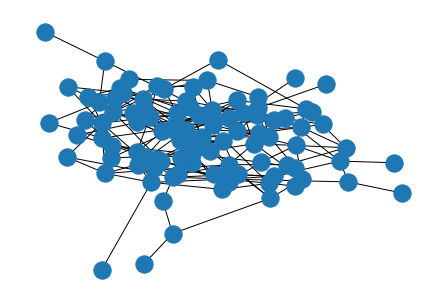

In [30]:
num_nodes=100
num_edges=200
# defining a random graph with the defined num of nodes ang edges.
graph = nx.gnm_random_graph(num_nodes, num_edges)
# generating randome positive weights
weights =  np.random.randint(100, size=num_edges)
# looping over the graph's edges to fill the weights 
for i, node in zip (range(0,num_edges) , graph.edges()):
    graph[node[0]][node[1]]['weight'] = weights[i]
    graph[node[1]][node[0]]['weight'] = weights[i]
nx.draw(graph)

In [31]:
time=np.zeros((4, 10))
# loop to apply each algorithm 10 times
for i in range (10):
    # dijkstra_path from node 5 to node 55 
    start = timer()
    nx.algorithms.shortest_paths.weighted.dijkstra_path(graph, 5, 55, 'weight')
    end = timer()
    time[0][i]=(end - start)
    # dijkstra_path from node 5 to node 85 
    start = timer()
    nx.algorithms.shortest_paths.weighted.dijkstra_path(graph, 5, 85, 'weight')
    end = timer()
    time[1][i]=(end - start)
    # bellman_ford_path from node 5 to node 55 
    start = timer()
    nx.algorithms.shortest_paths.weighted.bellman_ford_path( graph, 5, 55, 'weight')
    end = timer()
    time[2][i]=(end - start)
    # bellman_ford_path from node 5 to node 55 
    start = timer()
    nx.algorithms.shortest_paths.weighted.bellman_ford_path( graph, 5, 55, 'weight')
    end = timer()
    time[3][i]=(end - start)

In [49]:
# Printing a table with results of time concumed by each algorithm for two paths
# first path from 5 to 55
# second path from 5 to 85
results=[]
results.append(time[0])
results.append(time[1])
results.append(time[2])
results.append(time[3])
row_headers=['dijkstra_path 5->55','dijkstra_path 5->85','bellman_ford_path 5->55','bellman_ford_path 5->85']
print(tabulate(results,  tablefmt='fancy_grid',numalign ='center',showindex=row_headers))

╒═════════════════════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│ dijkstra_path 5->55     │ 0.0017048 │ 8.02e-05  │ 2.42e-05  │ 2.08e-05  │ 1.93e-05  │ 1.37e-05  │ 1.33e-05  │ 1.26e-05  │ 5.33e-05  │ 2.11e-05  │
├─────────────────────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ dijkstra_path 5->85     │ 0.0013157 │ 0.0001003 │ 6.61e-05  │ 6.29e-05  │ 6.06e-05  │ 5.49e-05  │ 5.59e-05  │ 5.28e-05  │ 7.28e-05  │ 0.0002023 │
├─────────────────────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ bellman_ford_path 5->55 │ 0.001754  │ 0.0011574 │ 0.0010654 │ 0.001033  │ 0.000994  │ 0.0009386 │ 0.0009039 │ 0.0009473 │ 0.0010354 │ 0.0011913 │
├─────────────────────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼─

In [52]:
# printing Avg of time consumed by each algo for each path
avg_djk_1= sum(time[0])/10
avg_djk_2=sum(time[1])/10
avg_bel_1=sum(time[2])/10
avg_bel_2=sum(time[3])/10
print (" Avg djk 5->55  " + str(avg_djk_1))
print (" Avg djk 5->85  " + str(avg_djk_2))
print (" Avg bel 5->55  " + str(avg_bel_1))
print (" Avg bel 5->85  " + str(avg_bel_2))

 Avg djk 5->55  0.0001963299999715673
 Avg djk 5->85  0.00020442999989427334
 Avg bel 5->55  0.0011020300000382122
 Avg bel 5->85  0.0011326800000006187


## Second part

[(1, 6), (0, 6), (0, 5), (0, 4), (1, 4), (2, 4), (3, 4), (3, 3)]


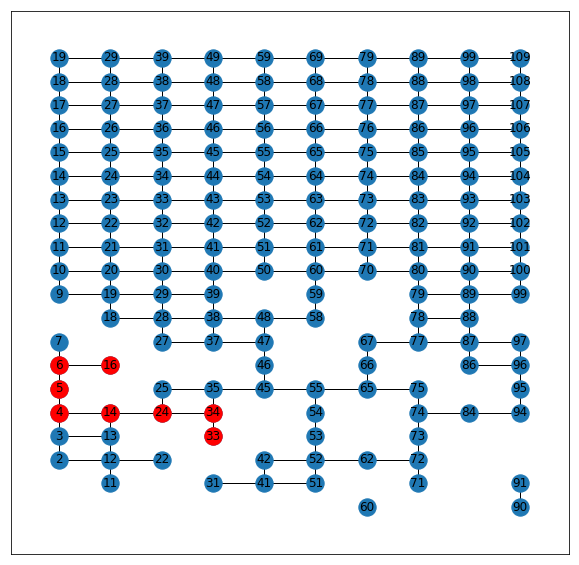

In [60]:
plt.figure(figsize=(10, 10))
cell_dim_1 = 10
cell_dim_2 = 20
obstacles = 40
# defining a grid with the selected size
grid= nx.grid_2d_graph(cell_dim_1, cell_dim_2)
# making the 40 obstacles
edges_to_delete = np.random.randint(0, cell_dim_1, size=(obstacles, 2))
edges_to_delete = list(map(tuple, edges_to_delete))
grid.remove_nodes_from(edges_to_delete)
pos = dict((n, n) for n in grid.nodes())
labels = dict(((i, j), i * 10 + j) for i, j in grid.nodes())
# Drawing the resulting Grid
nx.draw_networkx(grid, pos=pos, labels=labels)
# finding the path between (1,6), (3, 3) through applying A* algorithm
path = nx.algorithms.shortest_paths.astar.astar_path(grid, (1,6), (3, 3))
print(path)
#drawing the path
nx.draw_networkx_nodes(grid, pos, nodelist=path, node_color='r')

### Repeating 5 times

path from (1, 9) to (9, 4):
[(1, 9), (2, 9), (3, 9), (3, 8), (4, 8), (4, 7), (4, 6), (4, 5), (5, 5), (6, 5), (7, 5), (7, 4), (8, 4), (9, 4)]


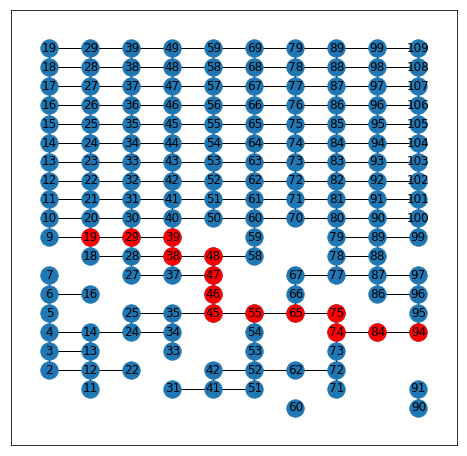

In [79]:
plt.figure(figsize=(8, 8))
start_node = (1,9)
end_node = (9,4)
print(f'path from {start_node} to {end_node}:')
path = nx.algorithms.shortest_paths.astar.astar_path( grid, start_node, end_node)
nx.draw_networkx(grid, pos=pos, labels=labels)
nx.draw_networkx_nodes(grid, pos, nodelist=path, node_color='r')
print(path)

path from (1, 8) to (8, 6):
[(1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (5, 9), (5, 10), (6, 10), (7, 10), (8, 10), (8, 9), (8, 8), (8, 7), (8, 6)]


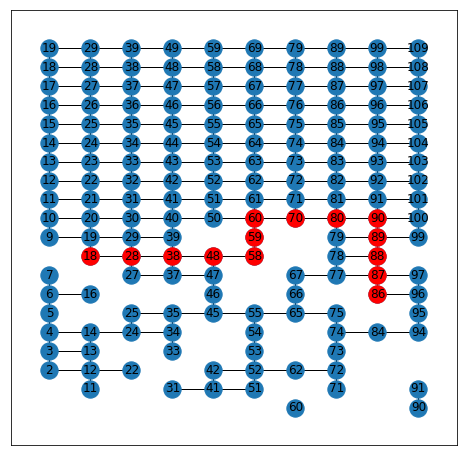

In [71]:
plt.figure(figsize=(8, 8))
start_node = (1,8)
end_node = (8,6)
print(f'path from {start_node} to {end_node}:')
path = nx.algorithms.shortest_paths.astar.astar_path( grid, start_node, end_node)
nx.draw_networkx(grid, pos=pos, labels=labels)
nx.draw_networkx_nodes(grid, pos, nodelist=path, node_color='r')
print(path)

path from (2, 7) to (9, 9):
[(2, 7), (3, 7), (4, 7), (4, 8), (5, 8), (5, 9), (5, 10), (6, 10), (7, 10), (8, 10), (9, 10), (9, 9)]


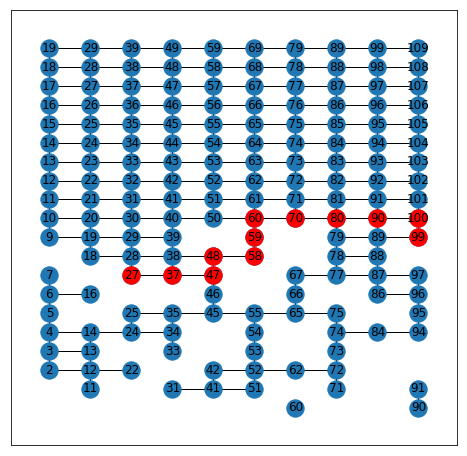

In [72]:
plt.figure(figsize=(8, 8))
start_node = (2,7)
end_node = (9,9)
print(f'path from {start_node} to {end_node}:')
path = nx.algorithms.shortest_paths.astar.astar_path( grid, start_node, end_node)
nx.draw_networkx(grid, pos=pos, labels=labels)
nx.draw_networkx_nodes(grid, pos, nodelist=path, node_color='r')
print(path)

path from (3, 9) to (3, 3):
[(3, 9), (3, 8), (4, 8), (4, 7), (4, 6), (4, 5), (3, 5), (3, 4), (3, 3)]


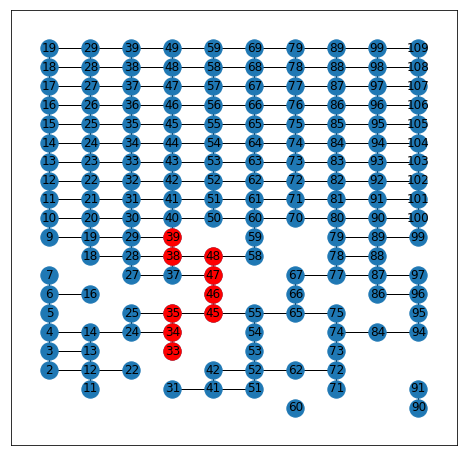

In [78]:
plt.figure(figsize=(8, 8))
start_node = (3,9)
end_node = (3,3)
print(f'path from {start_node} to {end_node}:')
path = nx.algorithms.shortest_paths.astar.astar_path( grid, start_node, end_node)
nx.draw_networkx(grid, pos=pos, labels=labels)
nx.draw_networkx_nodes(grid, pos, nodelist=path, node_color='r')
print(path)

path from (2, 7) to (9, 5):
[(2, 7), (3, 7), (4, 7), (4, 6), (4, 5), (5, 5), (6, 5), (7, 5), (7, 4), (8, 4), (9, 4), (9, 5)]


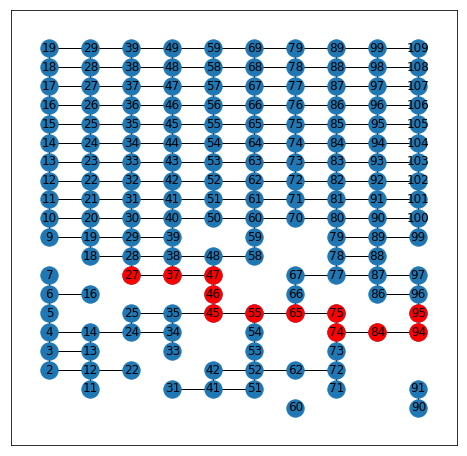

In [83]:
plt.figure(figsize=(8, 8))
start_node = (2,7)
end_node = (9,5)
print(f'path from {start_node} to {end_node}:')
path = nx.algorithms.shortest_paths.astar.astar_path( grid, start_node, end_node)
nx.draw_networkx(grid, pos=pos, labels=labels)
nx.draw_networkx_nodes(grid, pos, nodelist=path, node_color='r')
print(path)